# Vignettes

Model predictions at some interesting locus-- LIN28A on chr1 is a good test candidate.

**Inputs**:
1. Outputs from Py_Vignette script-- normalized insertsions and prediction tsvs at some locus.
2. Cluster config

In [1]:
library(ggplot2)
library(patchwork)
library(Gviz)
library(rtracklayer)
library(ggplotify)
library(ggseqlogo)
library(scales)
library(BSgenome.Hsapiens.UCSC.hg38)
library(reshape2)
hg38 = BSgenome.Hsapiens.UCSC.hg38

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min



Attaching package: ‘S4Vectors’


The

## Load Input Data

### Configs

In [2]:
cluster_config = read.table("../configs/cluster.tsv", comment.char = '', header=T, sep='\t')
cluster_config$colour = as.character(cluster_config$colour)
cluster_config$description = as.character(cluster_config$description)


cluster_config = cluster_config[!is.na(cluster_config$cluster), ]
rownames(cluster_config) = as.factor(cluster_config$cluster)
cluster_config$new_cluster = as.integer(cluster_config$new_cluster)
cluster_config$cluster = as.integer(cluster_config$cluster)
cluster_config

,cluster,colour,description,new_cluster
,<int>,<chr>,<chr>,<int>
1,1,#B03743,Fibroblast,1
2,2,#E85F6D,Fibroblast-like,3
3,3,#7C2730,Fibroblast-like,2
4,4,#F0A118,Intermediate,12
5,5,#78A824,Pre-iPSC,13
6,6,#A6D854,Pre-iPSC,14
7,7,#F01D35,Fibroblast-like,5
8,8,#13C4A3,iPSC,15
9,9,#406614,Partially-reprogrammed,10


## Preds/Insertions

In [4]:
loci = c("early_ZIC.chr13.47816983", "transient_AP1.chr12.44034800", "transient_TFAP2.chr18.770650")

In [155]:
importance = list()

for (x in loci) {
  importance[[x]] = read.table(sprintf("./py_vignette_intermediate/%s.profile.explain.tsv", x), 
                         sep='\t',
                        header=T)
    rownames(importance[[x]]) = importance[[x]]$cluster_idx
    importance[[x]]$cluster_idx = NULL
    importance[[x]]
}

In [156]:
importance[[loci[[1]]]]

,lower_lim,upper_lim,X1,X2,X3,X4,X5,X6,X7,X8,⋯,X1991,X1992,X1993,X1994,X1995,X1996,X1997,X1998,X1999,X2000
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.006169,0.053066,0,-5.102500e-05,8.965353e-05,2.285102e-04,3.004749e-05,1.230573e-05,0.0001873971,0.0001923931,⋯,7.126830e-05,2.816821e-04,1.758070e-04,2.196581e-05,-1.603669e-04,4.222741e-05,-1.692048e-05,2.667389e-06,0,0
11,-0.006126,0.032478,0,5.506359e-05,3.456703e-04,2.849563e-04,1.064174e-04,1.588346e-04,0.0001927498,0.0003293456,⋯,-2.528492e-04,3.984564e-04,1.021452e-04,4.933027e-04,-3.838176e-05,1.943592e-04,-2.480212e-04,-4.105173e-05,0,0
14,-0.005274,0.040337,0,4.266961e-05,1.357362e-04,9.335983e-05,-3.234880e-07,1.975839e-04,0.0001985587,0.0002605356,⋯,5.521354e-05,-8.413918e-06,-5.510558e-05,-1.417507e-04,-2.732840e-04,-8.961797e-06,-1.128141e-04,-2.879448e-05,0,0
4,-0.005042,0.046032,0,1.921911e-04,3.756689e-04,3.341705e-04,5.502901e-04,3.596307e-04,0.0003824298,0.0006528030,⋯,-1.705066e-05,8.898405e-05,8.840287e-05,1.039836e-04,-4.394389e-04,-5.285643e-05,-1.262572e-04,2.822748e-05,0,0
5,-0.004155,0.039642,0,2.008140e-04,2.061134e-04,1.664563e-04,3.221390e-04,2.001228e-04,0.0001866801,0.0004894146,⋯,1.851549e-05,1.972387e-05,3.199623e-04,9.908349e-05,6.295215e-06,1.128606e-04,-1.578270e-04,3.192653e-05,0,0
6,-0.004341,0.041151,0,6.381289e-04,-6.646718e-05,4.989396e-04,6.936847e-04,5.721456e-04,0.0005123702,0.0006704437,⋯,1.377627e-04,1.248672e-04,3.675908e-04,1.753385e-04,-3.263969e-04,8.483286e-05,-1.177812e-04,1.136045e-04,0,0
8,-0.005052,0.051197,0,2.258085e-04,-1.191184e-04,-7.495744e-06,3.712891e-04,3.035637e-04,0.0003296207,0.0003475843,⋯,1.274772e-04,5.194651e-05,2.296084e-04,2.093025e-04,-2.313520e-04,2.189806e-04,-1.582911e-04,1.726778e-04,0,0


In [11]:
CLUSTERS = rownames(importance[[loci[1]]])
CLUSTERS

[1] "1"  "11" "14" "4"  "5"  "6"  "8"

**Cluster bigwigs**

In [102]:
bigwig_paths = list()
for (x in CLUSTERS) {
    bigwig_paths[[x]] = sprintf("/oak/stanford/groups/akundaje/surag/projects/scATAC-reprog/clusters/20210714_n64913/croo/cluster_idx%s/signal/rep1/cluster_idx%s.pval.signal.bigwig", x, x)
}

bigwig_paths

$`1`
[1] "/oak/stanford/groups/akundaje/surag/projects/scATAC-reprog/clusters/20210714_n64913/croo/cluster_idx1/signal/rep1/cluster_idx1.pval.signal.bigwig"

$`11`
[1] "/oak/stanford/groups/akundaje/surag/projects/scATAC-reprog/clusters/20210714_n64913/croo/cluster_idx11/signal/rep1/cluster_idx11.pval.signal.bigwig"

$`14`
[1] "/oak/stanford/groups/akundaje/surag/projects/scATAC-reprog/clusters/20210714_n64913/croo/cluster_idx14/signal/rep1/cluster_idx14.pval.signal.bigwig"

$`4`
[1] "/oak/stanford/groups/akundaje/surag/projects/scATAC-reprog/clusters/20210714_n64913/croo/cluster_idx4/signal/rep1/cluster_idx4.pval.signal.bigwig"

$`5`
[1] "/oak/stanford/groups/akundaje/surag/projects/scATAC-reprog/clusters/20210714_n64913/croo/cluster_idx5/signal/rep1/cluster_idx5.pval.signal.bigwig"

$`6`
[1] "/oak/stanford/groups/akundaje/surag/projects/scATAC-reprog/clusters/20210714_n64913/croo/cluster_idx6/signal/rep1/cluster_idx6.pval.signal.bigwig"

$`8`
[1] "/oak/stanford/groups/akundaje/surag/projects/scATAC-reprog/clusters/20210714_n64913/croo/cluster_idx8/signal/rep1/cluster_idx8.pval.signal.bigwig"

## Functions

In [99]:
# one bigwig at a time, any number of peaks
get_matrix_from_bigwig <- function(bigwig_path, peak_set) {
    # ensure peak set has fixed width
    stopifnot(length(unique(width(peak_set)))==1)
    
    as.matrix(import(bigwig_path, 
      which=peak_set, as="NumericList"))
}

In [100]:
# many bigwigs, one peak
get_signal_from_bigwigs <- function(clusters, bigwig_paths, peak) {
    preds = list()
    
    for (i in clusters) {
        preds[[i]] = as.vector(get_matrix_from_bigwig(bigwig_paths[[i]], peak))
    }
    
    preds
}

In [12]:
plot_mat <- function(obs_mat, pred_mat, label_off=100, title=F) {
    plots = list()
    stopifnot(ncol(obs_mat)==ncol(pred_mat))
    
    i=1
    for (x in CLUSTERS[order(cluster_config[CLUSTERS,"new_cluster"])]) {
        plots[[i]] = ggplot(data.frame(x=seq(ncol(obs_mat)),
                                       y=unlist(obs_mat[x, ]))) +
                    geom_line(aes(x=x,y=y), size=.3, col=cluster_config[x, "colour"]) +
                    geom_area(aes(x=x,y=y), fill=cluster_config[x,"colour"]) +
                    coord_cartesian(ylim=c(0,1)) + 
                    theme_void(base_size=18) +
                    annotate('text', x=ncol(obs_mat)-label_off, y=0.7, label="Obs", size=6) +
                    theme(plot.title = element_text(hjust = 0.05))
        
        plots[[i]] = plots[[i]] + 
                            ggtitle(paste(cluster_config[x, "new_cluster"],
                              cluster_config[x, "description"],
                             sep=" - ")) 
        
        plots[[i+1]] = ggplot(data.frame(x=seq(ncol(pred_mat)),
                                       y=unlist(pred_mat[x, ]))) +
                    geom_line(aes(x=x,y=y), size=.3, col=cluster_config[x, "colour"]) +
                    geom_area(aes(x=x,y=y), fill=cluster_config[x,"colour"]) +
                    coord_cartesian(ylim=c(0,1)) + 
                    theme_void() +
                    annotate('text', x=ncol(obs_mat)-label_off, y=0.7, label="Pred", size=6) +
                    theme(plot.title = element_text(hjust = 0.05))
        
        plots[[i+1]] = plots[[i+1]] + 
                            ggtitle(" ") 

#         else {
#             # need this to keep alignment
#             plots[[i]] = plots[[i]] + ggtitle(" ")
#         }
        
        i = i + 2
    }
    
    plots
}


In [13]:
# many bigwigs, one peak
importance_to_matrix <- function(clusters, imp_scores, peak) {
    # get DNA sequence
    sequence = hg38[[as.vector(seqnames(peak))]][(start(peak)+1):(end(peak))]
    
    scores = list()
    
    for (i in clusters) {
        m = matrix(0, length(sequence), 4)
        colnames(m) = c("A", "C", "G", "T")
        m[cbind(seq(length(sequence)), as.vector(matrix(sequence)))] = unlist(imp_scores[i, 3:ncol(imp_scores)])
        
        scores[[i]] = t(m)
    }
    
    scores
}

In [14]:
plot_seq <- function(m, ymin, ymax, clip=F, cutrange=NULL) {
    mat = m
    
#     rownames(mat) = c("A", "C", "G", "T")
    
    # cap to upper and lower limits
    if (clip==T) {
        mat[mat>ymax] = ymax
        mat[mat<ymin] = ymin
    }
    
    
    if (length(cutrange) == 0) {
        p = ggseqlogo(mat, method='custom', seq_type='dna') 
    }
    
    else {
        p = ggseqlogo(mat[,cutrange], method='custom', seq_type='dna') 
    }
    
    p = p + theme_void() + coord_cartesian(ylim=c(ymin, ymax))
    
    p
}

In [15]:
options(repr.plot.width = 5, repr.plot.height = 24)

get_cluster_cbar <- function(subset=NULL) {
    
    cluster_config_selected = cluster_config[as.character(CLUSTERS),]
    
    if (!is.null(subset)) {
        cluster_config_selected = cluster_config_selected[cluster_config_selected$new_cluster %in% subset, ]
    }
    
    
    # cluster_config_selected$y = factor(paste(cluster_config_selected$new_cluster, cluster_config_selected$description, sep=' - '))
    cluster_config_selected$y = factor(cluster_config_selected$new_cluster)
    levels(cluster_config_selected$y) = cluster_config_selected$y[rev(order(cluster_config_selected$new_cluster))]

    cluster_colourbar <- ggplot(cluster_config_selected, 
                                aes(x=1, 
                                y=y, 
                                fill = y, 
                                label= new_cluster)) +
      geom_bar(stat="identity") +
    #   ylab("scRNA Cell State") +
      theme_void() +
      scale_fill_manual(values = as.character(cluster_config_selected$colour[rev(order(cluster_config_selected$new_cluster))])) +
      theme(legend.position = 'none',
    #         axis.text.y = element_text(size=26, margin=margin(t=10, r= -150))
    #         axis.title.y = element_text(size=20, angle=90, margin=margin(t=10))
           ) # adjust this to match heights

    for (i in seq(nrow(cluster_config_selected))) {
        cluster_colourbar = cluster_colourbar + annotate("text", x=0.5, y=i, 
                                                         label=levels(cluster_config_selected$y)[i], 
                                                         color="white",
                                                        size=4)
    }
    
    cluster_colourbar
}


In [16]:
cluster_colourbar = get_cluster_cbar()

## Plotting

In [19]:
loci

[1] "early_ZIC.chr13.47816983"     "transient_AP1.chr12.44034800"
[3] "transient_TFAP2.chr18.770650"

In [28]:
SLICES_FROM_MID = list()
SLICES_FROM_MID[["early_ZIC.chr13.47816983"]] = c()

Warning message in "early_ZIC.chr13.47816983":c(1, 2):
"numerical expression has 2 elements: only the first used"
Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"


ERROR: Error in "early_ZIC.chr13.47816983":c(1, 2): NA/NaN argument


In [30]:
GRanges("chr12:1-2")

GRanges object with 1 range and 0 metadata columns:
      seqnames    ranges strand
         <Rle> <IRanges>  <Rle>
  [1]    chr12       1-2      *
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths

In [157]:
imp_matrices = list()

for (x in loci) {
    chrm = lapply(strsplit(x, "\\."), "[[", 2)
    midpoint = as.numeric(lapply(strsplit(x, "\\."), "[[", 3))
    imp_matrices[[x]] = importance_to_matrix(CLUSTERS, importance[[x]], GRanges(sprintf("%s:%d-%d", chrm, midpoint-1000, midpoint+1000)))
}

In [158]:
loci

[1] "early_ZIC.chr13.47816983"     "transient_AP1.chr12.44034800"
[3] "transient_TFAP2.chr18.770650"

In [195]:
imp_plots = list()

slices = list() # on either side of midpoint
slices[[1]] = c(30,30)
slices[[2]] = c(48,63)
slices[[3]] = c(15,35)

for (j in seq(length(loci))) {
    i=1
    cur_imp_scores = list()
    for (x in CLUSTERS[order(cluster_config[CLUSTERS,"new_cluster"])]) {

        cur_imp_scores[[i]] = plot_seq(imp_matrices[[loci[j]]][[x]][,(1000-slices[[j]][1]):(1000+slices[[j]][2])], 
                       ymin=importance[[loci[j]]][x, "lower_lim"],
                       ymax=importance[[loci[j]]][x, "upper_lim"] ,
                       clip=T) 
        
        if (i==1) {
            chrm = lapply(strsplit(loci[[j]], "\\."), "[[", 2)
            midpoint = as.numeric(lapply(strsplit(loci[[j]], "\\."), "[[", 3))
            cur_imp_scores[[i]] = cur_imp_scores[[i]] + ggtitle(sprintf("%s:%d-%d", chrm, midpoint-slices[[j]][1], midpoint+slices[[j]][2]))
        }
    #         annotate('text', x=SLICE_END-SLICE_BEGIN+10, y=importance[x, "upper_lim"]-0.02, 
    #                  label="Imp", size=6)
        i = i+1
    }

    imp_plots[[j]] = wrap_plots(cur_imp_scores, ncol=1)
}

Coordinate system already present. Adding new coordinate system, which will replace the existing one.

Coordinate system already present. Adding new coordinate system, which will replace the existing one.

Coordinate system already present. Adding new coordinate system, which will replace the existing one.

Coordinate system already present. Adding new coordinate system, which will replace the existing one.

Coordinate system already present. Adding new coordinate system, which will replace the existing one.

Coordinate system already present. Adding new coordinate system, which will replace the existing one.

Coordinate system already present. Adding new coordinate system, which will replace the existing one.

Coordinate system already present. Adding new coordinate system, which will replace the existing one.

Coordinate system already present. Adding new coordinate system, which will replace the existing one.

Coordinate system already present. Adding new coordinate system, which wi

In [196]:
signal_plots = list()

for (j in seq(length(loci))) {
    chrm = lapply(strsplit(loci[[j]], "\\."), "[[", 2)
    midpoint = as.numeric(lapply(strsplit(loci[[j]], "\\."), "[[", 3))
    
    signal = get_signal_from_bigwigs(CLUSTERS, bigwig_paths, GRanges(sprintf("%s:%d-%d", chrm, midpoint-500, midpoint+500)))
    
    i=1
    cur_signal = list()
    for (x in CLUSTERS[order(cluster_config[CLUSTERS,"new_cluster"])]) {

        cur_signal[[i]] = ggplot(data.frame(x=seq(length(signal[[x]])), y=signal[[x]])) +
                        geom_area(aes(x=x,y=y), fill=cluster_config[x, "colour"]) + theme_void() +
                        coord_cartesian(ylim=c(2,40))
                
        i = i+1
    }

    signal_plots[[j]] = wrap_plots(cur_signal, ncol=1)
}

In [198]:
assemble_plots = list()
widths = c()
SIGNAL_WIDTH=10
i = 1

for (j in seq(length(loci))) {
    assemble_plots[[i]] = imp_plots[[j]]
    assemble_plots[[i+1]] = signal_plots[[j]]
    
    widths = c(widths, sum(slices[[j]]), SIGNAL_WIDTH)
    i = i + 2
}

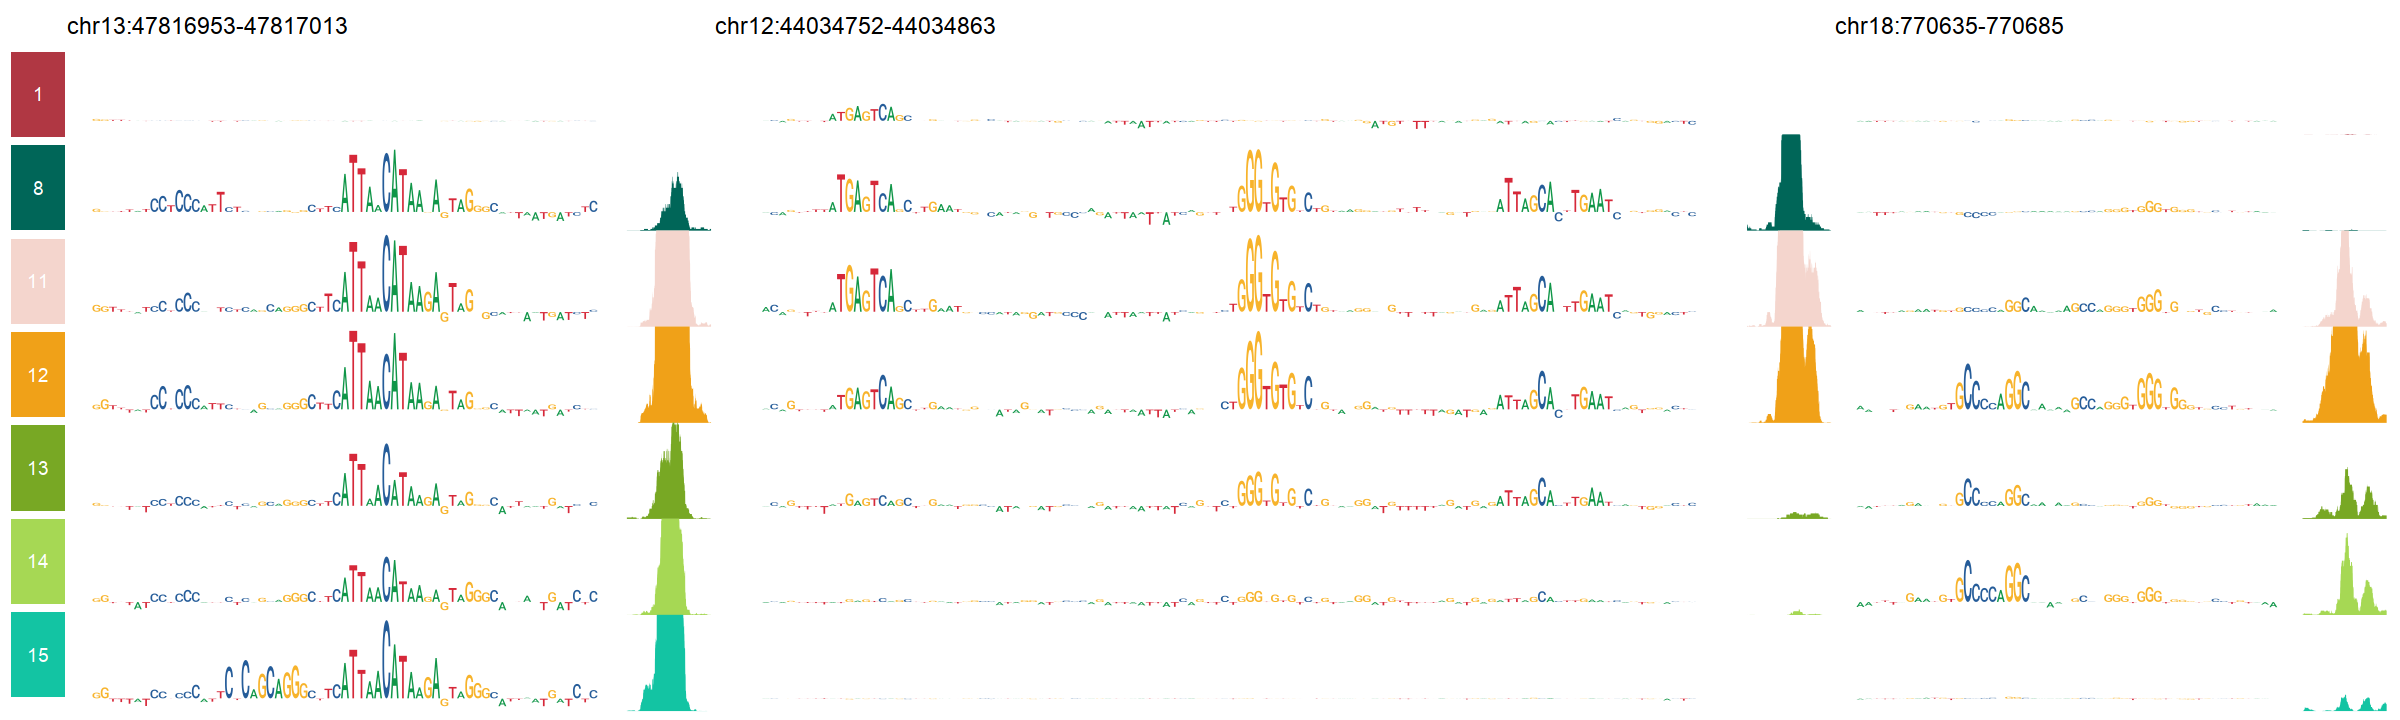

In [199]:
options(repr.plot.width = 20, repr.plot.height = 6)

combined = wrap_plots(cluster_colourbar, wrap_plots(assemble_plots, widths=widths), widths=c(1,40))
combined

In [200]:
ggsave(sprintf("./subfigs/vignettes_w_peaks.pdf"), 
       combined, height=6, width=20,
      useDingbats=F)

---

In [173]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.6 LTS

Matrix products: default
BLAS/LAPACK: /users/surag/anaconda3/envs/r36_cran/lib/libopenblasp-r0.3.9.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] grid      parallel  stats4    stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] reshape2_1.4.4                    BSgenome.Hsapiens.UCSC.hg38_1.4.1
 [3] BSgenome_1.54.0                   Biostrings_2.54.0                
 [5] XVector_0.26.0                    scales_1.1.0                     
 [7] ggseqlogo_0.1                     ggplo